In [1]:
import matplotlib.pyplot as plt
import numpy as np
import style

# Notebook illustrating properties of the analytical Lippmann transform

In [2]:
light_speed = 299792458
lambda_min = 400e-9
lambda_max = 700e-9
k_min = 2*np.pi/lambda_max
k_max = 2*np.pi/lambda_min
k_span = (k_max-k_min)/2
k = np.linspace(-k_span, k_span, 500) 

def filter_s(k, tau=1e-6, Z=5e-6):
    fake_wavenumber = tau + 2j * k
    return (1 - np.exp(-fake_wavenumber*Z))/fake_wavenumber

def plot_complex_amplitude(ax, amplituede, name):
    ax.plot(k, np.imag(amplituede), label="imaginary")
    ax.plot(k, np.real(amplituede), label="real")
    ax.legend(loc="upper right")
    ax.set_xlabel("\(k'\)")
    yfmt = style.ScalarFormatterForceFormat()
    yfmt.set_powerlimits((0,0))
    ax.yaxis.set_major_formatter(yfmt)
    plt.savefig(name, transparent=True)
    plt.show()


### Different depths of the plate (bandwith of the filter)

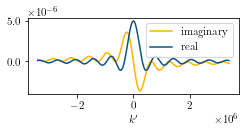

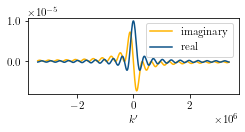

In [3]:
fig = plt.figure()
plot_complex_amplitude(fig.gca(), filter_s(k, Z=5e-6), "filter_z_5.pdf")

fig = plt.figure()
plot_complex_amplitude(fig.gca(), filter_s(k, Z=10e-6), "filter_z_10.pdf")

### Different attenuation coefficient tau (smoothing of the filter)

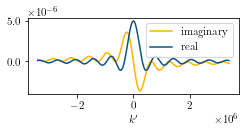

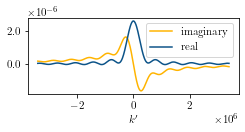

In [4]:
tau=3e5

fig = plt.figure()
plot_complex_amplitude(fig.gca(), filter_s(k, Z=5e-6), "filter_z_5.pdf")

fig = plt.figure()
plot_complex_amplitude(fig.gca(), filter_s(k, tau=3e5, Z=5e-6), "filter_z_5_dev.pdf")

### Effects of different components of the filter

In [6]:
lambda_min = 400e-9
lambda_max = 700e-9
lambda_1 = 500e-9
k_1 = 2*np.pi/lambda_1
wavelengths = np.linspace(lambda_min, lambda_max, 200)
k = 2*np.pi/wavelengths
rho = 0.3
theta = np.pi

from pylab import rcParams
rcParams['figure.figsize'] = 15, 4

def plot_components(ax, p_0):
    k_grid = np.tile(k, (len(k), 1))
    o_1 = np.exp(1j*theta)*(1+rho**2)*filter_s(k_grid, Z=5e-6).T
    o_2 = rho*filter_s(k_grid - k_grid.T, Z=5e-6).T
    ax[0].plot(k, p_0,  c="C2")
    ax[0].set_title("Input spectrum")

    ax[1].plot(k, np.real(o_2 @ p_0), label="real filt.")
    ax[1].plot(k, np.imag(o_2 @ p_0), label="imag. filt.")
    ax[1].plot(k, np.real(o_1 @ p_0), label="real const.")
    ax[1].plot(k, np.imag(o_1 @ p_0), label="imag. const.")
    ax[1].legend()
    ax[1].set_title("Filter components")

    ax[2].plot(k, np.real((o_2 + o_1) @ p_0),  label="real")
    ax[2].plot(k, np.imag((o_2 + o_1) @ p_0), label="imag.")
    ax[2].legend()
    ax[2].set_title("Filter parts")

    ax[3].plot(k, np.abs((o_2 + o_1) @ p_0)**2, c="C2", label="total")
    ax[3].plot(k, np.abs(o_2 @ p_0)**2, c="C3", linestyle="--", label="filt. only")
    ax[3].legend()
    ax[3].set_title("Output spectrum")
    plt.show()

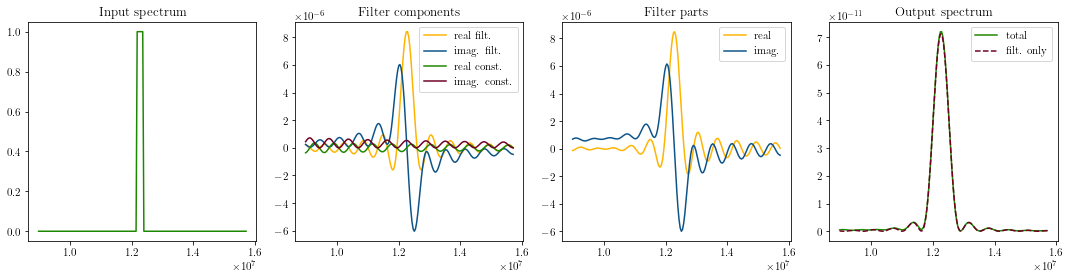

In [7]:
fig, ax = plt.subplots(1, 4)
p_0 = np.zeros_like(k)
p_0[72:78] = 1
plot_components(ax, p_0)

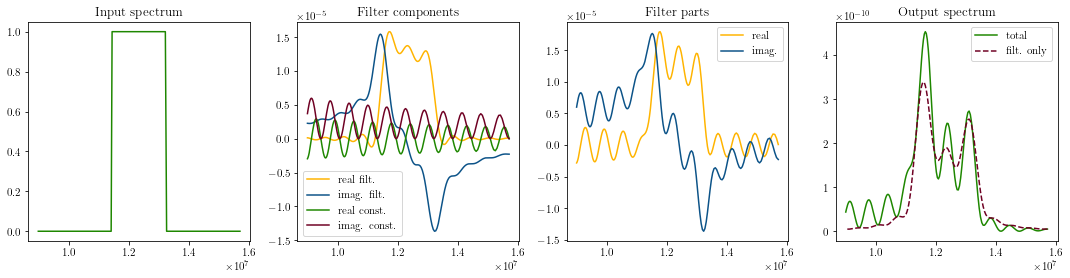

In [8]:
fig, ax = plt.subplots(1, 4)
p_0 = np.zeros_like(k)
p_0[50:100] = 1
plot_components(ax, p_0)

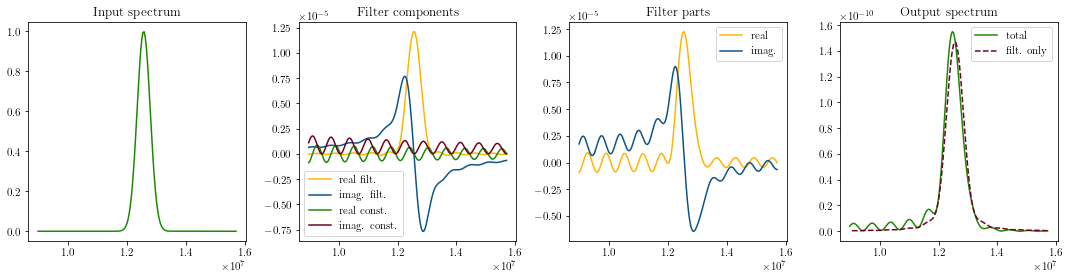

In [9]:
fix, ax = plt.subplots(1, 4)
p_0 = np.exp(-(k-k_1)**2/1e11)
plot_components(ax, p_0)

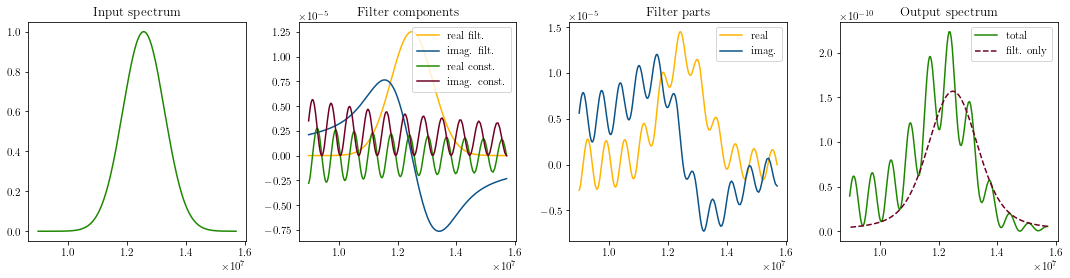

In [10]:
fix, ax = plt.subplots(1, 4)
p_0 = np.exp(-(k-k_1)**2/1e12)
plot_components(ax, p_0)